In [19]:
# from EPIK_Utils import embed_knowledge_b
import ReqsPRESTO
import pandas as pd
import numpy as np

In [20]:
data_dir = "data/FPR_R1R2_p3/ParetoFrontSet"
filenames = [
                "ParetoFrontSetNSGAII-11b.csv",
                "ParetoFrontSetSPEA2-12.csv",
                # "ParetoFrontSetNSGAII-20.csv"
]

dfData = []



In [21]:
from EPIK_Utils import load_solutions_all

def embed_knowledge_b (data_dir, filename, property_eval_func, n=10 ** 6):
    #load Pareto front solutions
    df = load_solutions_all(data_dir, filename)
    df = df.loc[:19, :]

    #find column names of variables
    variables = [c for c in df.columns.tolist() if "v" in c]

    df_elusive_props_moments = pd.DataFrame(columns=['EP1_median', 'EP1_mean', 'EP1_std'])
    df_elusive_props_results = pd.DataFrame(columns=[])


    for i in df.index:
        variable_values = df.loc [i, variables]

        list_a = [variable_values[i] for i in range(len(variables)) if i % 2 == 0]
        list_b = [variable_values[i] for i in range(len(variables)) if i % 2 == 1]

        #sample
        list_samples = [np.random.beta(list_a[i], list_b[i], size=n) for i in range(len(list_a))]

        # Sample for the property of interest given the generated values
        sampled_Y = property_eval_func(list_samples)

        moments_i = [np.median(sampled_Y), np.mean(sampled_Y), np.std(sampled_Y)]

        #append to dfs
        df_elusive_props_moments.loc[i] = moments_i
        df_elusive_props_results["ID"+str(i)] = sampled_Y
        print(i)

    print(df_elusive_props_moments)
    return  df_elusive_props_results

In [22]:
dfResults = embed_knowledge_b(data_dir, filenames[0], ReqsPRESTO.property_R3_unknown_p3)

0
1
2
3
   EP1_median  EP1_mean   EP1_std
0    2.824163  2.805603  0.107253
1    2.834956  2.818329  0.096562
2    2.753214  2.744487  0.099974
3    2.753373  2.744451  0.100080


In [23]:
dfResults

,ID0,ID1,ID2,ID3
0,2.900245,2.691163,2.770735,2.727453
1,2.906969,2.838100,2.690262,2.633010
2,2.862072,2.876261,2.646974,2.749578
3,2.839345,2.897518,2.794822,2.706675
4,2.790627,2.794860,2.694422,2.711883
...,...,...,...,...
999995,2.841139,2.858245,2.649905,2.714574
999996,2.793493,2.928591,2.766838,2.778810
999997,2.914891,2.907754,2.740690,2.753088
999998,2.739957,2.908229,2.768189,2.888552


In [24]:
dfResults.quantile([0.05, 0.5, 0.95])

,ID0,ID1,ID2,ID3
0.05,2.601334,2.634592,2.565860,2.565481
0.50,2.824163,2.834956,2.753214,2.753373
0.95,2.945880,2.944902,2.893038,2.893289


In [ ]:
np.quantile(a=dfResults["ID0"], q=[0.05, 0.5, 0.95])

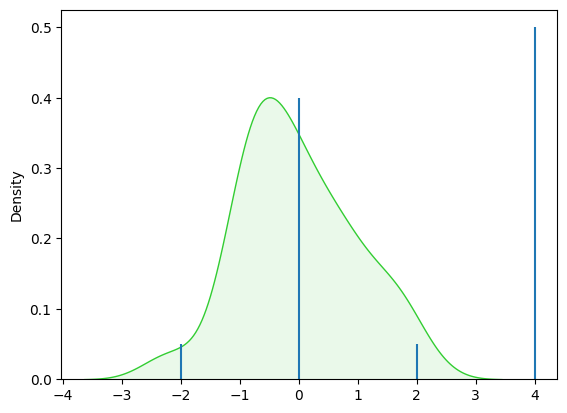

In [16]:



np.quantile(a=sampled_Y, q=[0.05, 0.5, 0.95]

α' = α + κ

λ' = λα' / (α + λκx')

λ' = λα/ (α + λκx')   + λκ /  (α + λκx')

α: a high initial value corresponds to a high confidence on the initial value
λ: initial rate


t * λ / (τ + τ')   +    κ / (τ + τ')

estimatedResults[0]= t_i_prior*r_ij_prior/(t_i_prior+t_i)+n_ij/(t_i_prior+t_i);
